# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо провести исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем нужные датафреймы.
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.duplicated().sum()

0

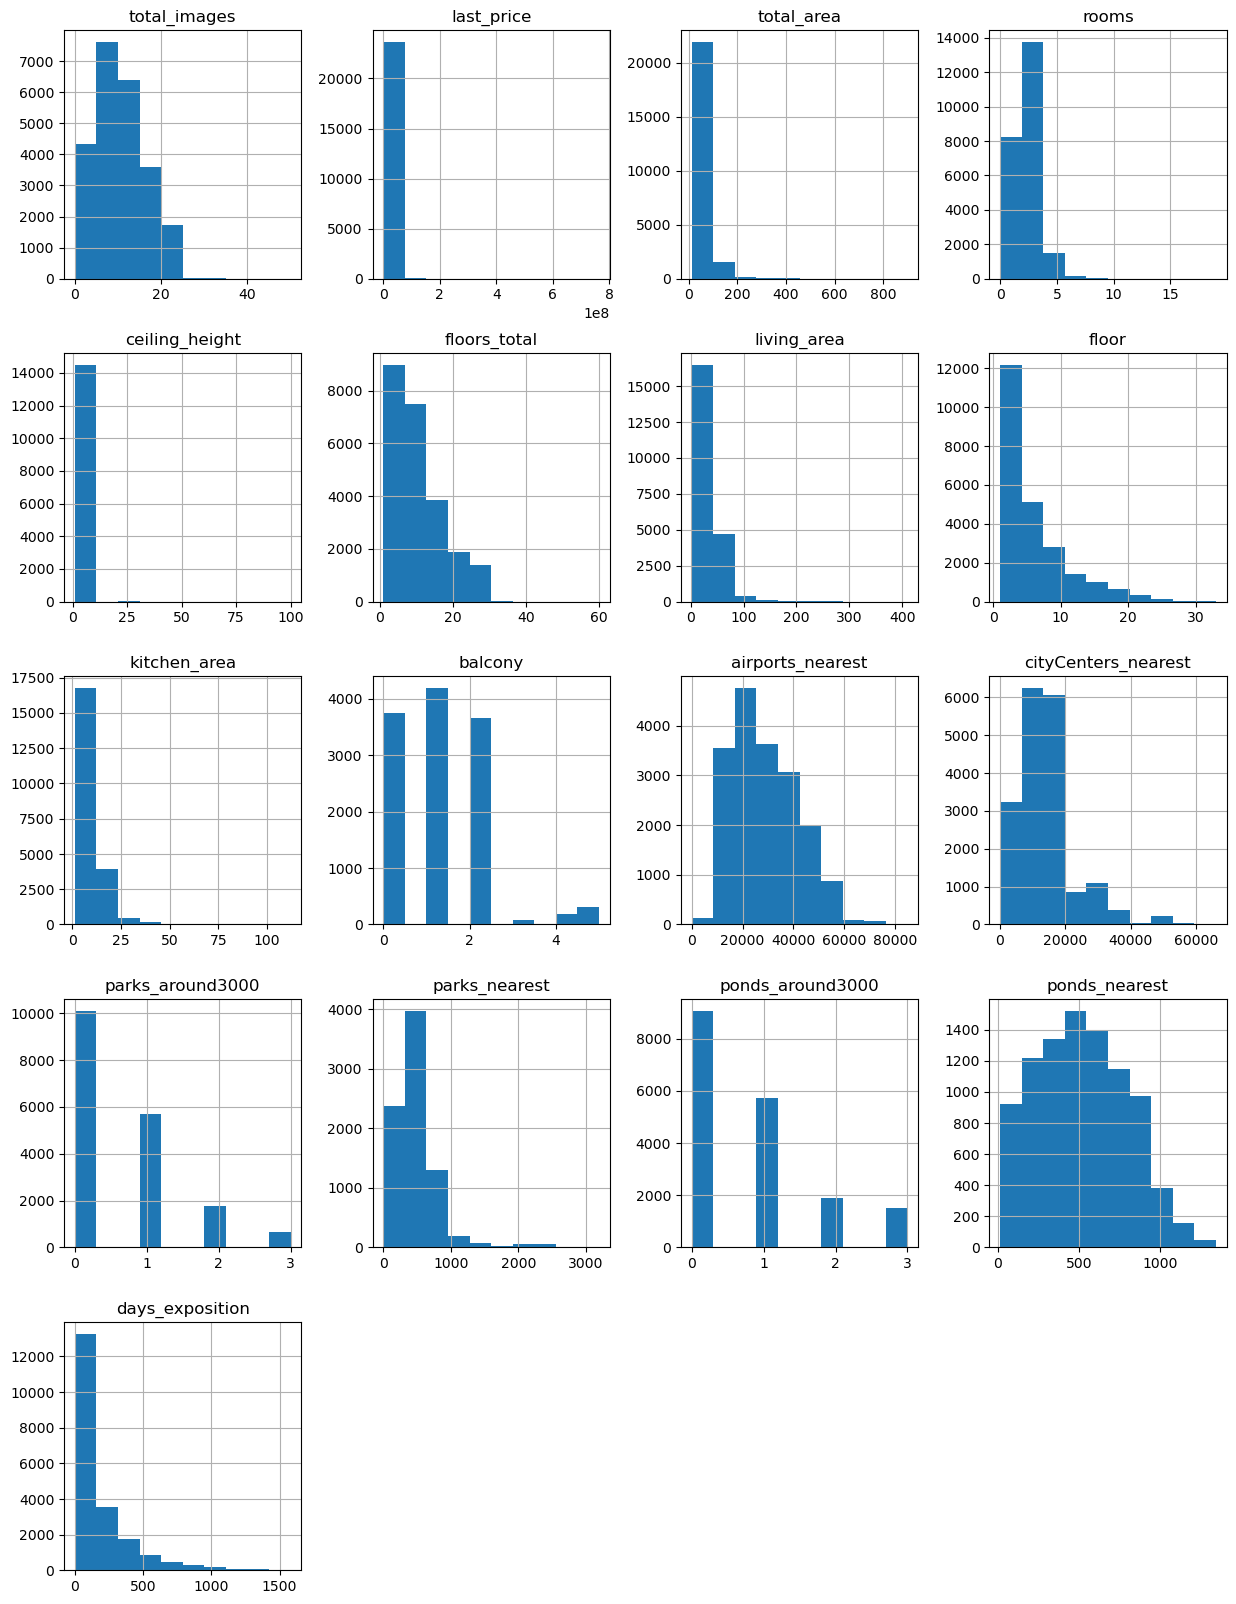

In [5]:
data.hist(figsize=(15, 20))
plt.show()

### Выполните предобработку данных

##### Смотрим количество пропущенных значений 

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Переименовываем столбцы змеинным регистром

In [7]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

In [8]:
data['total_area'].round(2)

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

In [9]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].unique()

<DatetimeArray>
['2019-03-07 00:00:00', '2018-12-04 00:00:00', '2015-08-20 00:00:00',
 '2015-07-24 00:00:00', '2018-06-19 00:00:00', '2018-09-10 00:00:00',
 '2017-11-02 00:00:00', '2019-04-18 00:00:00', '2018-05-23 00:00:00',
 '2017-02-26 00:00:00',
 ...
 '2015-11-15 00:00:00', '2015-04-21 00:00:00', '2015-04-04 00:00:00',
 '2015-01-06 00:00:00', '2015-06-13 00:00:00', '2016-10-30 00:00:00',
 '2015-03-27 00:00:00', '2014-12-29 00:00:00', '2016-09-12 00:00:00',
 '2015-07-19 00:00:00']
Length: 1491, dtype: datetime64[ns]

Заменяем медийным значением строки NaN в столбце ceiling_height(Высота потолков)

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [12]:
data['ceiling_height'].sort_values(ascending=True).head(30)

22590    1.00
5712     1.20
16934    1.75
20520    2.00
552      2.00
4212     2.00
5850     2.00
16884    2.00
19098    2.00
16446    2.00
11352    2.00
2572     2.00
22960    2.00
19329    2.00
12755    2.20
17794    2.25
17762    2.30
5498     2.30
23498    2.30
1582     2.30
227      2.34
15444    2.40
14463    2.40
20564    2.40
15939    2.40
13271    2.40
14345    2.40
11125    2.40
7270     2.40
15453    2.40
Name: ceiling_height, dtype: float64

In [13]:
data['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

Высота потолка слишком большая в некоторых ячейках

In [14]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10

In [15]:
data['ceiling_height'].sort_values(ascending=False).head(30)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
17442     8.00
15743     8.00
3474      8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
6802      4.50
14519     4.50
13224     4.50
10159     4.50
2823      4.50
9783      4.50
3067      4.50
8018      4.45
7521      4.45
6728      4.40
Name: ceiling_height, dtype: float64

In [16]:
data['floors_total'].dropna(inplace=True)

In [17]:
data['is_apartment'].mean()

0.018018018018018018

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# Заменяем тип данных на "bool"
data['is_apartment'] = data['is_apartment'].astype(bool)

In [19]:
data['is_apartment'].mean()

0.0021097936621798387

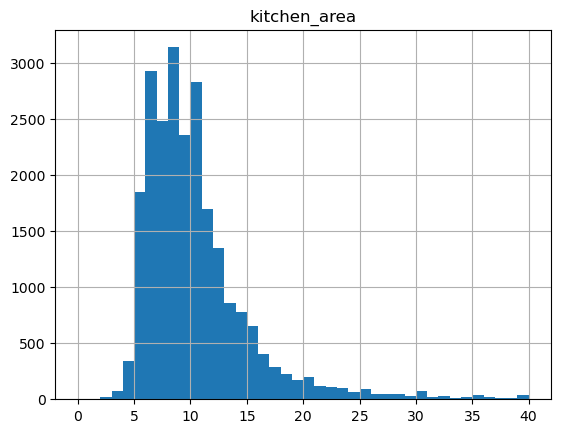

In [21]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*(data['kitchen_area'].median()/data['total_area'].median()))
data.hist('kitchen_area', bins=40, range=(0, 40))
plt.show()

В большинстве квартир кухня занимает 9 кв.м

In [22]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
data['locality_name'].nunique()

364

In [25]:
data['locality_name'] = data['locality_name'].str.lower()
# Оставим только названия
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)

In [26]:
data['locality_name'].nunique()

314

In [27]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'городской янино-1', 'парголово',
       'мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'кудрово', 'коммунар', 'колпино', 'красный бор', 'гатчина',
       'федоровское', 'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокс

In [28]:
#Заменяем пропуски на 'unknown'
data['locality_name'].dropna(inplace=True)

In [29]:
data['airports_nearest'].round(2)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

Возможно в этих населённых пунктах нет аэропорта.

In [30]:
data['city_centers_nearest'].round(2)

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23699, dtype: float64

Незаполненные пропуски возможно, указывают, что недвидимость находится за пределами города

Незаполненные пропуски возможно, указывают, что недвижимость находится далеко от водоема.

days_exposition(сколько дней было размещено объявление (от публикации до снятия)):
незаполненые пропуски могут быть из-за того, что недвижимость ещё не сдали.

### Добавьте в таблицу новые столбцы

In [31]:
#Добавим столбец со стоимостью одного квадратного метра
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

In [32]:
#Добавляем столбец с днем недели публикации объявления
data['day_publication'] = data['first_day_exposition'].dt.weekday 
data['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [33]:
data['month_publication'] = data['first_day_exposition'].dt.month
data['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

In [34]:
data['year_publication'] = data['first_day_exposition'].dt.year
data['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [35]:
def floor(row):
    if row['floor']== 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

data['type_floor'] = data.apply(floor, axis=1) 
data['type_floor'].unique()

array(['Другой', 'Первый', 'Последний'], dtype=object)

In [36]:
data['type_floor'].value_counts()

type_floor
Другой       17446
Последний     3336
Первый        2917
Name: count, dtype: int64

In [37]:
data['distance_city_center'] = round(data['city_centers_nearest'] / 1000)
data['distance_city_center'] = data['distance_city_center'].astype('Int32')
data['distance_city_center'].unique()

<IntegerArray>
[  16,   19,   14,    7,    8, <NA>,   12,   15,   52,   33,   31,   11,   13,
   10,    2,   32,    4,   17,   30,    5,   51,   50,   24,   18,    9,   28,
    3,    6,   27,   21,   49,   35,   36,   34,    1,   29,   26,   53,   22,
   55,   20,   23,   25,    0,   66,   47,   40,   57,   37,   41,   43,   48,
   62,   60,   39,   42,   65,   54,   59,   45,   61,   63]
Length: 62, dtype: Int32

### Проведите исследовательский анализ данных

<Axes: title={'center': 'Зависимость квартир в продаже от площади квартир'}, ylabel='Frequency'>

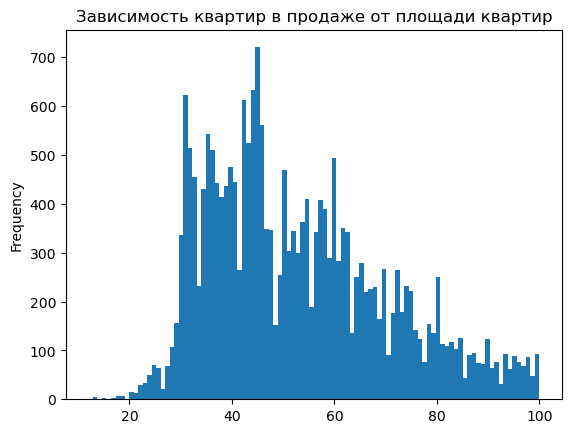

In [38]:
data['total_area'].plot(kind='hist', 
                        title='Зависимость квартир в продаже от площади квартир', 
                        bins=100, 
                        range=(12,100))

In [39]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Вывод: Чаще всего на рынке недвижимости представлены квартиры от 40 до 60 кв.м с максимумом 52 кв.м

<Axes: title={'center': 'Зависимость квартир в продаже от их жилой площади'}, ylabel='Frequency'>

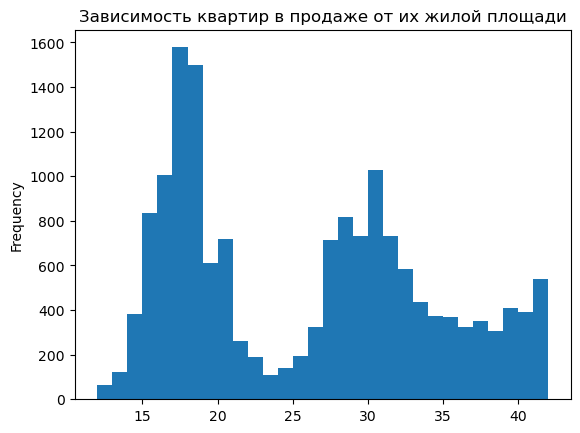

In [40]:
data['living_area'].plot(kind='hist',
                         title='Зависимость квартир в продаже от их жилой площади',
                         bins=30, range=(12, 42))

In [41]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Вывод: Чаще всего на рынке недвижимости представлены квартиры с жилой площадью 18кв.м и 30кв.м

<Axes: title={'center': 'Зависимость квартир в продаже от площади кухни'}, ylabel='Frequency'>

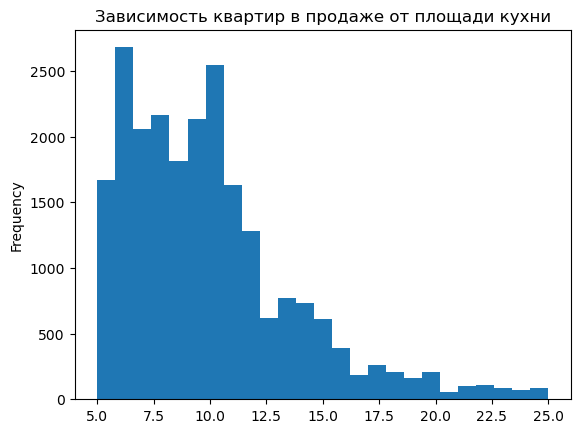

In [42]:
data['kitchen_area'].plot(kind='hist', 
                        title='Зависимость квартир в продаже от площади кухни', 
                        bins=25, 
                        range=(5,25))

In [43]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.505495
std          6.039401
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Вывод: Чаще всего на рынке недвижимости представлены квартиры с площадью кухни от 6 до 12 кв.м, дальше замечается спад предложений.

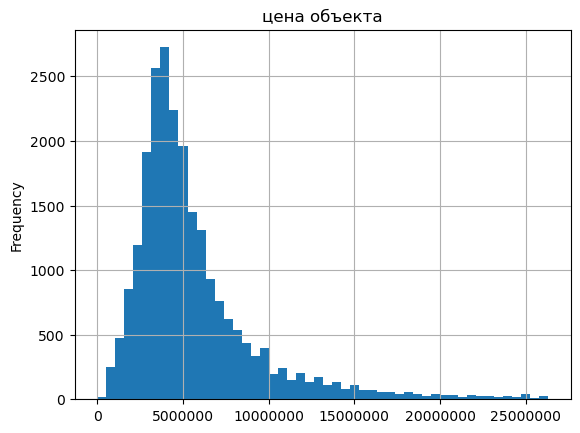

In [44]:
data['last_price'].plot(kind='hist', 
                        title='цена объекта', 
                        bins=50, 
                        range=(1.219000e+04, 2.630000e+07),
                        grid=True)
plt.ticklabel_format(style='plain', axis='both')

In [45]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Вывод: Чаще всего представлены квартиры от 3.5 до 5 млн. рублей.

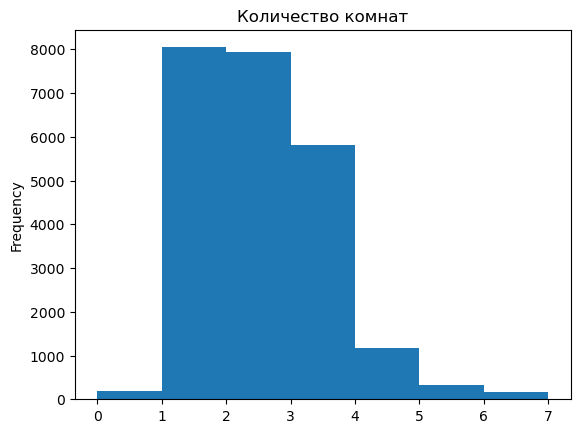

In [47]:
data['rooms'].plot(kind='hist', 
                        title='Количество комнат', 
                        bins=7, 
                        range=(0, 7),
)
plt.show()

In [48]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [49]:
data.drop(index=data.query('rooms > 8').index,inplace=True)

Вывод: Чаще всего на рынке недвижимости представлены квартиры однокомнатные или двухкомнатные, дальше количество предложений уменьшается 

<Axes: title={'center': 'Высота потолков'}, ylabel='Frequency'>

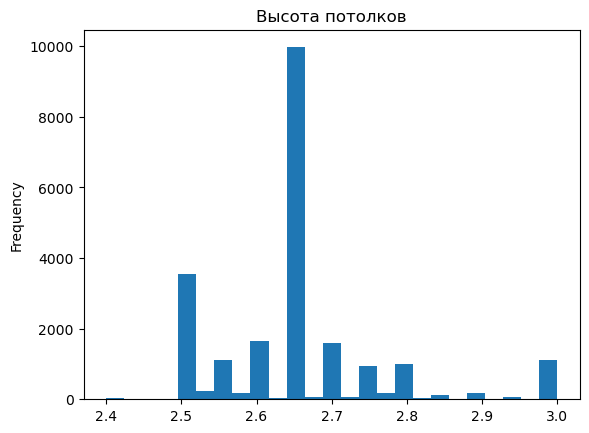

In [50]:
data['ceiling_height'].plot(kind='hist', 
                        title='Высота потолков', 
                        bins=25, 
                        range=(2.4, 3))

In [51]:
data['ceiling_height'].describe()

count    23680.000000
mean         2.698416
std          0.252940
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Вывод: Чаще всего на рынке недвижимости представлены с большим отрывом квартиры с потолками 2.65.

<Axes: xlabel='type_floor'>

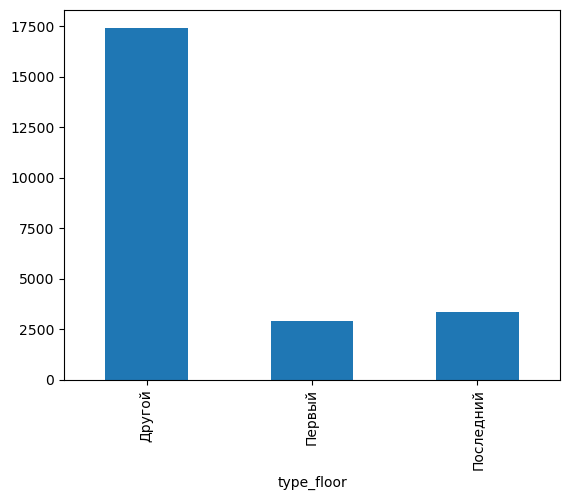

In [52]:
data.groupby(by='type_floor')['type_floor'].count().plot(kind='bar')

In [53]:
data['type_floor'].describe()

count      23680
unique         3
top       Другой
freq       17436
Name: type_floor, dtype: object

Вывод: Меньше всего люди преобретают квартиры на первом этаже. 

<Axes: title={'center': 'Этажи'}, ylabel='Frequency'>

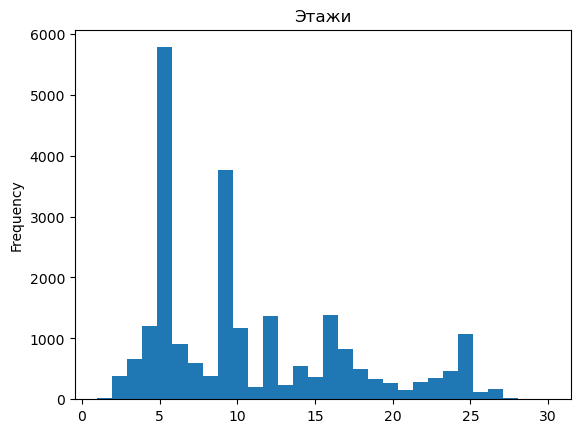

In [54]:
data['floors_total'].plot(kind='hist', 
                        title='Этажи', 
                        bins=30, 
                        range=(1, 30))

In [55]:
data['floors_total'].describe()

count    23594.000000
mean        10.677545
std          6.597205
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Вывод: Чаще всего люди предпочитают 5 этаж, на втором месте 9 этаж.

<Axes: title={'center': 'Расстояние до парка'}, ylabel='Frequency'>

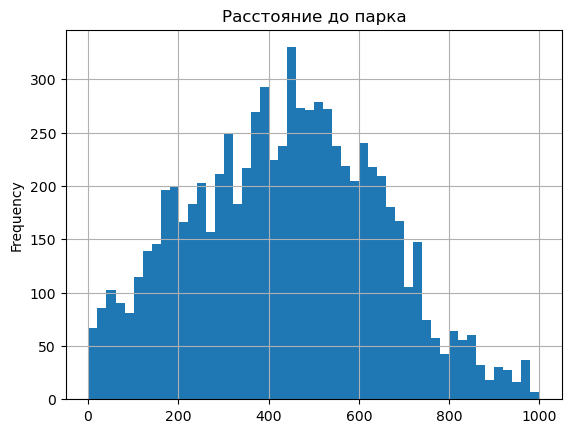

In [56]:
data['parks_nearest'].plot(kind='hist', 
                        title='Расстояние до парка', 
                        bins=50, 
                        range=(1, 1000),
                        grid=True)

In [57]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.975694
std       342.539576
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Вывод: Чаще всего среднее расстояние до парка премерно составляет 200 - 700

<Axes: title={'center': 'расстояние до центра города'}, ylabel='Frequency'>

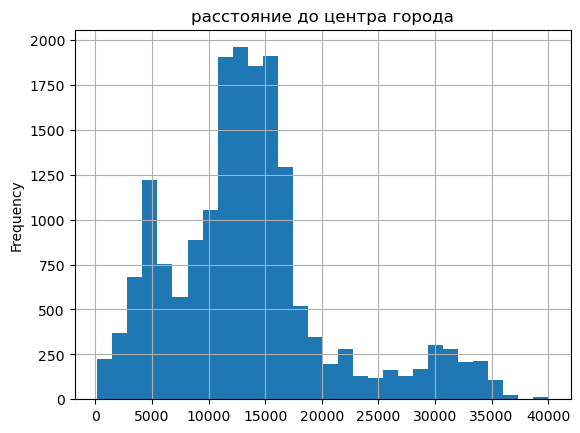

In [58]:
data['city_centers_nearest'].plot(kind='hist', 
                            title='расстояние до центра города', 
                            bins=30, 
                            range=(181, 40000),
                            grid=True)

In [59]:
data['city_centers_nearest'].describe()

count    18161.000000
mean     14199.176312
std       8608.489247
min        181.000000
25%       9238.000000
50%      13107.000000
75%      16294.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Вывод: Чаще всего люди покупают квартиры от 12 до 16 км от центра города.

Общий вывод:
- Самое большое предложение квартир с общей площадью от 40 до 69 кв.м. с максимумом 52 кв.м.
- Больше всего продают квартир с жилой площадью около 18 кв.м и 30 кв.м.
- Больше всего предложений с площадью кухни от 6 до 12 кв.м.
- Чаще всего представлены квартиры от 3.5 до 4.5 млн. рублей.
- реди предложений больше всего однокомнатных и двухкомнатных квартир.
- На рынке недвижимости представлены с большим отрывом квартиры с потолками 2.65.
- Меньше всего люди преобретают квартиры на первом этаже
- Люди предпочитают больше всего жить на 5 и 9 этажах.
- Чаще всего люди покупают квартиры от 12 до 16 км от центра города.
- Среднее расстояние до парка премерно составляет 200 - 700

<Axes: title={'center': 'расстояние до центра города'}, ylabel='Frequency'>

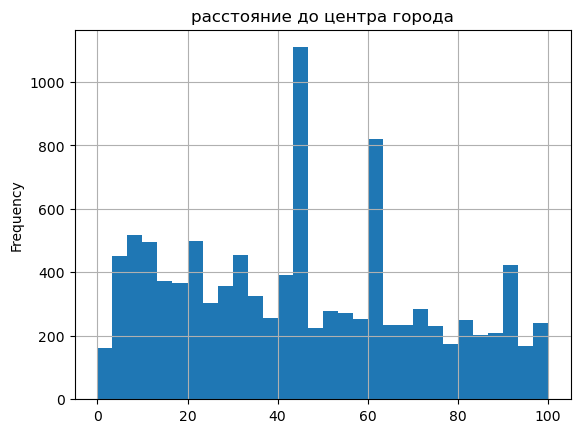

In [60]:
data['days_exposition'].plot(kind='hist', 
                            title='расстояние до центра города', 
                            bins=30, 
                            range=(0, 100),
                            grid=True)

In [61]:
data['days_exposition'].describe()

count    20505.000000
mean       180.765960
std        219.516438
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вывод: Чаще всего продажа квартиры занимает 95 дней, но среднее значение составляет 180 дней. Быстрыми продажами можно считать продажи состоявшиеся за 45 дней, а необычно долгие продажи после 232 дня 

In [62]:
list_corr_price = ['total_area', 'living_area', 'kitchen_area', 'rooms']
for i in list_corr_price:
    corr_price = data['last_price'].corr(data[i])
    print(f'Корреляция между общей стоимость объекта и {i} составляет:{corr_price}')

Корреляция между общей стоимость объекта и total_area составляет:0.6435074272009865
Корреляция между общей стоимость объекта и living_area составляет:0.5582376165252972
Корреляция между общей стоимость объекта и kitchen_area составляет:0.5028854412590799
Корреляция между общей стоимость объекта и rooms составляет:0.3564558452519555


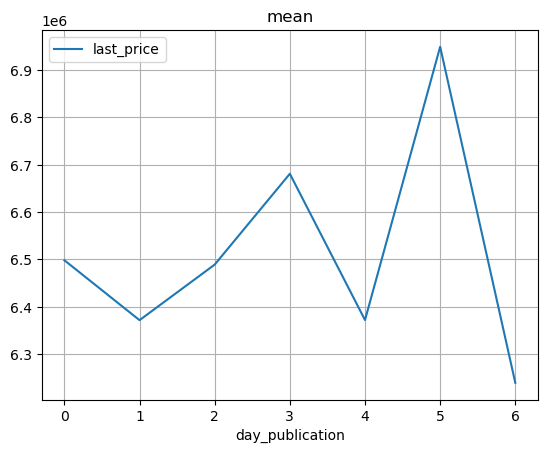

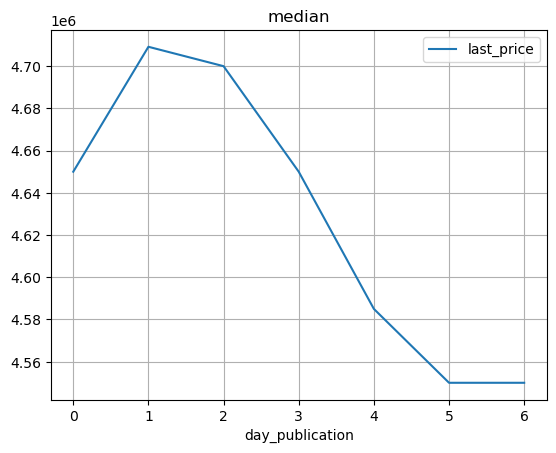

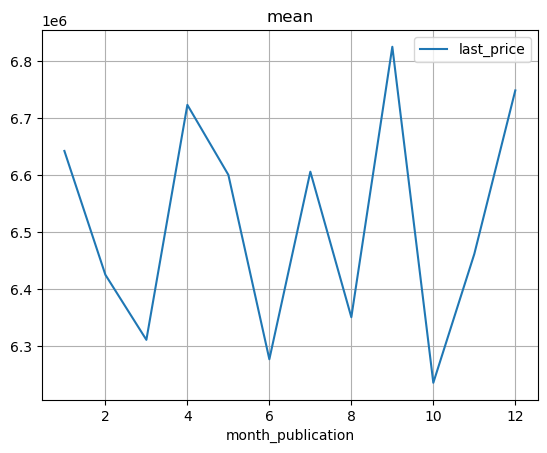

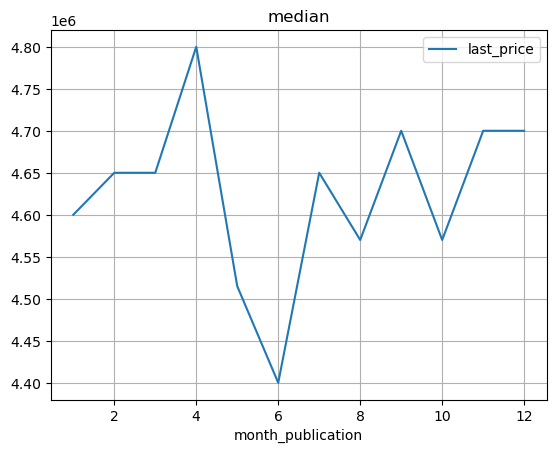

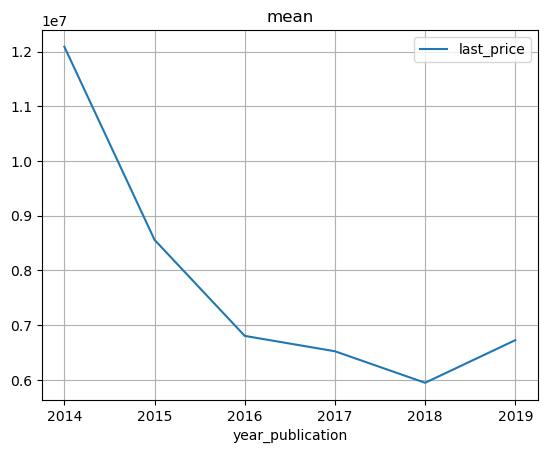

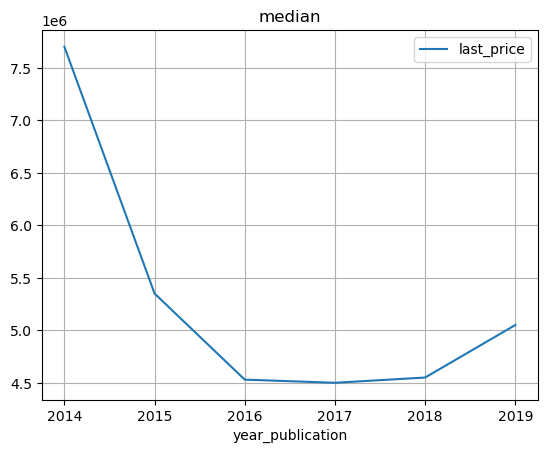

In [63]:
data.pivot_table(index='day_publication',values='last_price',aggfunc='mean').plot(kind='line', title='mean', grid=True);
data.pivot_table(index='day_publication',values='last_price',aggfunc='median').plot(kind='line', title='median', grid=True);

data.pivot_table(index='month_publication',values='last_price',aggfunc='mean').plot(kind='line', title='mean', grid=True);
data.pivot_table(index='month_publication',values='last_price',aggfunc='median').plot(kind='line', title='median', grid=True);

data.pivot_table(index='year_publication',values='last_price',aggfunc='mean').plot(kind='line', title='mean', grid=True);
data.pivot_table(index='year_publication',values='last_price',aggfunc='median').plot(kind='line', title='median', grid=True);

<Axes: title={'center': 'Зависимость цены от площади кухни'}, xlabel='kitchen_area'>

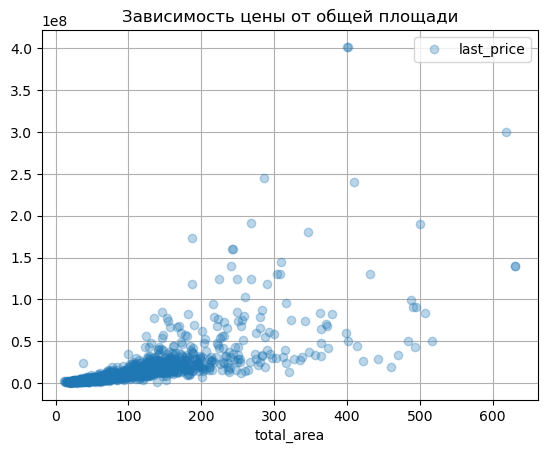

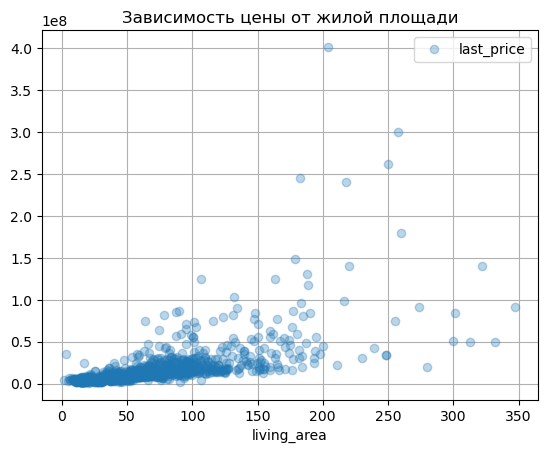

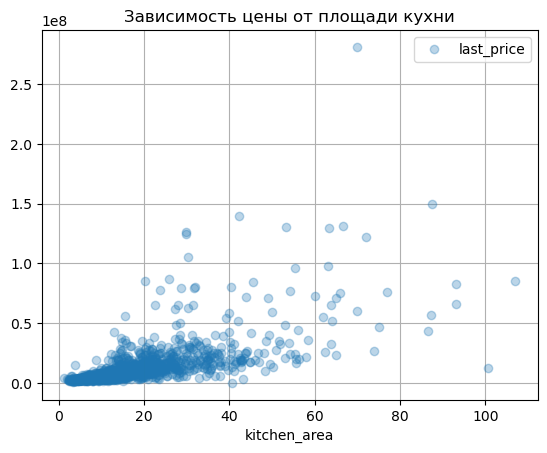

In [64]:
(data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', title='Зависимость цены от общей площади', alpha=0.3)
)
(data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', title='Зависимость цены от жилой площади', alpha=0.3)
)
(data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', title='Зависимость цены от площади кухни', alpha=0.3)
)


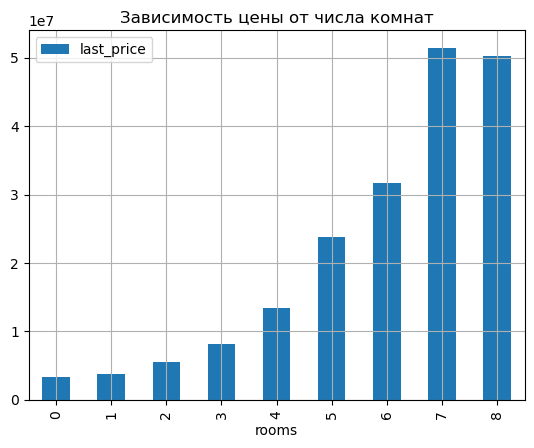

In [65]:
data.pivot_table(index='rooms',values='last_price').plot(kind='bar', grid=True, title='Зависимость цены от числа комнат');

<Axes: xlabel='type_floor'>

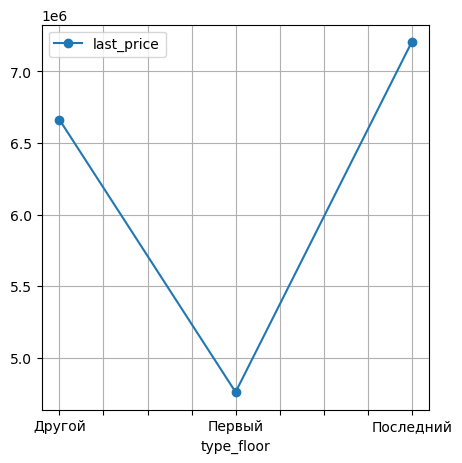

In [66]:
data.pivot_table(index='type_floor',values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

In [67]:
top_10 = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
top_10.columns = ['count']
top_10 = top_10.sort_values(by='count', ascending=False).head(10)
top_10['price_square_meter'] = data.pivot_table(index='locality_name', values='price_square_meter').round(2)
top_10.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
санкт-петербург,15702,114838.08
пушкин,369,103125.82
кудрово,472,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,338,75424.58
гатчина,307,68746.15
всеволожск,398,68654.47


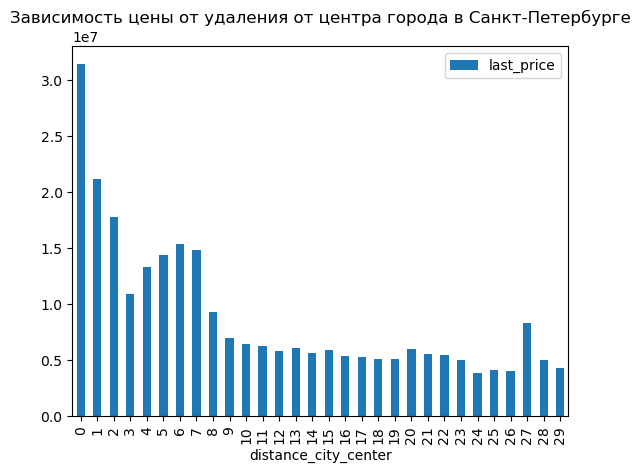

In [68]:
(data[data['locality_name']=='санкт-петербург']
    .pivot_table(
                index='distance_city_center',
                values='last_price',
                aggfunc='mean')
    .plot(kind='bar',
         title='Зависимость цены от удаления от центра города в Санкт-Петербурге')
)
plt.show()

### Напишите общий вывод

Общий вывод:
- Изучены и описаны параметры:
    - Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 52 кв. метра с кухней в 9 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 12-16 км. или 5 км. от центра города.
- Изучены насколько быстро продавались квартиры:
    - Чаще всего продажа квартиры занимает 95 дней, но среднее значение составляет 180 дней. Быстрыми продажами можно считать продажи состоявшиеся за 45 дней, а необычно долгие продажи после 232 дня.
- Определили факторы, которые больше всего влияют на общую (полную) стоимость объекта:
    - Чем больше общая площадь, тем выше стоимость. 
    - Чем больше комнат, тем больше стоимость(это может быть связано от того, что для большего числа комнат нужна большая площадь квартиры).
    - Первый этаж стоит меньше всего.
- Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:
    - Стоимость одного квадратного метра больше всего в Санкт-Петербурге, дальше идёт Пушкин и Кудрово.
- Вычислина средняя стоимость квартир на разном удалении от центра.
    - Самые дорогие квартиры в центре(до 1км)
    - Более низкие цены на недвижимость на расстоянии от 1 км. до 7 км.
    - Далее цена ещё ниже на расстоянии от 8 до 27 км.
    - На 27 км ожидается прирост цен, возможно из-за того, что там расположено Пушкино.